In [2]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.5 MB/s eta 0:00:00


# **BA2A:** Implement MotifEnumeration
Given a collection of strings Dna and an integer d, a k-mer is a (k,d)-motif if it appears in every string from Dna with at most d mismatches. The following algorithm finds (k,d)-motifs.
```
 MOTIFENUMERATION(Dna, k, d)
        Patterns ← an empty set
        for each k-mer Pattern in Dna
            for each k-mer Pattern’ differing from Pattern by at most d
              mismatches
                if Pattern' appears in each string from Dna with at most d
                mismatches
                    add Pattern' to Patterns
        remove duplicates from Patterns
        return Patterns



In [3]:
from itertools import product

def ham_distance(x,y):
  c = 0
  for i in range(len(x)):
    if x[i]!=y[i]:
      c = c+1
  return c

def get_combinations(k):
  t = ['A','C','G','T']
  combinations = list(product(t,repeat=k)) #creates combiinations of length k
  return combinations


def motifs(k,d,dna):
  patterns = []
  combinations = get_combinations(k)
  for item in combinations:
    str1 = ''.join(item)
    count1 = 0
    for pattern in dna:
      flag = 0
      for i in range(len(pattern)-k+1):
        p = pattern[i:i+k]
        h_dis = ham_distance(p,str1)
        if h_dis<=d:
          flag =1
          break
      if flag == 1:
        count1 = count1 + 1
    if count1 == len(dna):
      patterns.append(str1)
  return set(patterns)




dna = ['ATTTGGC','TGCCTTA','CGGTATC','GAAAATT']
motifs(3,1,dna)




{'ATA', 'ATT', 'GTT', 'TTT'}

# **BA2B:** Find a Median String
Given a k-mer Pattern and a longer string Text, we use d(Pattern, Text) to denote the minimum Hamming distance between Pattern and any k-mer in Text,
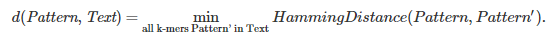

Given a k-mer Pattern and a set of strings Dna = {Dna1, … , Dnat}, we define d(Pattern, Dna) as the sum of distances between Pattern and all strings in Dna,
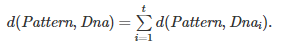

Our goal is to find a k-mer Pattern that minimizes d(Pattern, Dna) over all k-mers Pattern, the same task that the Equivalent Motif Finding Problem is trying to achieve. We call such a k-mer a median string for Dna.


In [4]:
import sys

#find all combinations
#iterate through each dna pattern -> find minimum hamming distance
#calculate sum of minimum hamming distance
#store combination having the lowest sum of hamming distance

def find_median_string(k,dna):
  median_string = ""
  combinations = get_combinations(k) #[code cell 1]
  lowest_distance = sys.maxsize
  for item in combinations:
    str1 = ''.join(item)
    dis = 0
    for pattern in dna:
      min_dis = k+1
      for i in range(len(pattern)-k+1):
        ham_dis = ham_distance(str1,pattern[i:i+k])
        min_dis = min(ham_dis,min_dis)
      dis = dis + min_dis     #sum of hamming distance
    if dis<lowest_distance:
      lowest_distance = dis
      median_string = str1
  return median_string


dna =  ['AATATGTTTTATGTGTCAGTTGGTCAAGATCTCGCTGGGTCG',
        'TCTTATGCCGCCTTCCAACAAGATCCCGGTGTATACTAACCT',
        'CCTGGACCCCACCTAGATAAAACTTACGTTGCAATATCTATT',
        'CAGGTGCTAGATCAAGACCTGGTTAATCTAGGATCAAACGGT',
        'CGCAAGGTCGCTCAAGATAAGGTCCCCCAGTGAGGAACAACC',
        'GATGGACAAGATATGCGAGCACACACTAGCATAGGGCCAAAT',
        'CCATCACTCCAGTTTTCACTAGATGTACTTGGTACGGATACG',
        'GAGCTTCCTTCGCAAGGCCAAGATACCCGAGTAACGGGCGCT',
        'AGACCCTTGATACTAGGCAGACGTGGTCACCCAGATGAAGTT',
        'GATGCGCATACATAGGTGGCTAGTGCGTTGCGAGATGATGCT']
find_median_string(6,dna)

'CAAGAT'

# **BA2C:** Find a Profile-most Probable k-mer in a String

Given a profile matrix Profile, we can evaluate the probability of every k-mer in a string Text and find a Profile-most probable k-mer in Text, i.e., a k-mer that was most likely to have been generated by Profile among all k-mers in Text. For example, ACGGGGATTACC is the Profile-most probable 12-mer in GGTACGGGGATTACCT. Indeed, every other 12-mer in this string has probability 0.Given a profile matrix Profile, we can evaluate the probability of every k-mer in a string Text and find a Profile-most probable k-mer in Text, i.e., a k-mer that was most likely to have been generated by Profile among all k-mers in Text. For example, ACGGGGATTACC is the Profile-most probable 12-mer in GGTACGGGGATTACCT. Indeed, every other 12-mer in this string has probability 0.

In general, if there are multiple Profile-most probable k-mers in Text, then we select the first such k-mer occurring in Text.

In [5]:
dict = {'A' : [0.321, 0.214, 0.25, 0.25, 0.179, 0.107, 0.429],
        'C' : [0.107, 0.286, 0.286, 0.25, 0.429, 0.393, 0.179],
        'G' : [0.393, 0.214, 0.143, 0.25, 0.179, 0.321, 0.286],
        'T' : [0.179, 0.286, 0.321, 0.25, 0.214, 0.179, 0.107]}

# def get_most_probable_k_mer(k,pattern):
#   min_probability = 0
#   s = ""
#   for i in range(len(pattern)-k+1):
#     k_mer = pattern[i:i+k]
#     p = 1
#     for j in range(len(k_mer)):
#       p = p * dict[k_mer[j]][j]
#     if p>min_probability:
#       min_probability = p
#       s = k_mer
#   return s

def get_most_probable_kmer(k,pattern,profile):
  most_probable = -1
  str1  = ""
  for i in range(len(pattern)-k+1):
    p=1.0
    s=pattern[i:i+k]
    for j in range(k):
      p=p*profile[s[j]][j]
    if p>most_probable:
      most_probable = p
      str1 = s
  return str1

# x = get_most_probable_k_mer(7,'GACGCGACACTAGATTGAGCATGGGCTCTGCGTCCTAACGTATCCGGGGTGGCAGAGAAAGACGTCGGTGAGGCTTCAGTAGTGCGCCGGCCGTGTCCAGTCAAGATGTGGCCATCAGCTCCGCTACATCAGGTGCGAATTCGTTATTTGGTAAGTGAAGCGGTAGTCAAGCCGAATAGATAAGGCGTGCACGCTGTTTC')
get_most_probable_kmer(7,'GACGCGACACTAGATTGAGCATGGGCTCTGCGTCCTAACGTATCCGGGGTGGCAGAGAAAGACGTCGGTGAGGCTTCAGTAGTGCGCCGGCCGTGTCCAGTCAAGATGTGGCCATCAGCTCCGCTACATCAGGTGCGAATTCGTTATTTGGTAAGTGAAGCGGTAGTCAAGCCGAATAGATAAGGCGTGCACGCTGTTTC',dict)


'GGTGCGA'

# **BA2D:** Implement GreedyMotifSearch

```
    GREEDYMOTIFSEARCH(Dna, k, t)
        BestMotifs ← motif matrix formed by first k-mers in each string
                      from Dna
        for each k-mer Motif in the first string from Dna
            Motif1 ← Motif
            for i = 2 to t
                form Profile from motifs Motif1, …, Motifi - 1
                Motifi ← Profile-most probable k-mer in the i-th string
                          in Dna
            Motifs ← (Motif1, …, Motift)
            if Score(Motifs) < Score(BestMotifs)
                BestMotifs ← Motifs
        return BestMotifs
```

In [6]:
def calculate_score(motifs):
  score = 0
  for i in range(len(motifs[0])):
    A = 0
    T = 0
    G = 0
    C = 0
    for j in range(len(motifs)):
      s = motifs[j][i]
      if s == 'A':
        A = A + 1
      elif s == 'T':
        T = T + 1
      elif s == 'G':
        G = G + 1
      elif s == 'C':
        C = C + 1
    lis = [A,T,G,C]
    lis.sort()
    score= score + lis[0]+lis[1]+lis[2]
  return score

def create_profile(motifs,pseudocount=0):
  profile = {
        'A':[],
        'C':[],
        'G':[],
        'T':[]
    }
  for i in range(len(motifs[0])):
    A = pseudocount
    T = pseudocount
    G = pseudocount
    C = pseudocount
    for j in range(len(motifs)):
      s = motifs[j][i]
      if s == 'A':
        A = A + 1
      elif s == 'T':
        T = T + 1
      elif s == 'G':
        G = G + 1
      elif s == 'C':
        C = C + 1
    total = A + T + G + C
    profile['A'].append(A / total)
    profile['T'].append(T / total)
    profile['G'].append(G / total)
    profile['C'].append(C / total)
  return profile

def  greedy_motif_search(k,t,dna,pseudocount=0):
  best_motifs = []
  min_score = sys.maxsize

  for i in range(len(dna[0])-k+1):   #first dna string
    motifs = []
    k_mer = dna[0][i:i+k]
    motifs.append(k_mer)
    profile = create_profile(motifs,pseudocount)
    for j in range(1,t):      #next dna strings
      probable_kmer = get_most_probable_kmer(k,dna[j],profile)  #[code cell 3]
      motifs.append(probable_kmer)
      profile = create_profile(motifs,pseudocount)
    score = calculate_score(motifs)
    if score < min_score:
      min_score= score
      best_motifs = motifs
  return  best_motifs

dna = ['GGCGTTCAGGCA','AAGAATCAGTCA','CAAGGAGTTCGC','CACGTCAATCAC','CAATAATATTCG']

greedy_motif_search(3,5,dna)


['CAG', 'CAG', 'CAA', 'CAA', 'CAA']

# **BA2E:** Implement GreedyMotifSearch with Pseudocounts
We encountered GreedyMotifSearch in “Implement GreedyMotifSearch”. In this problem, we will power it up with pseudocounts.

In [7]:
greedy_motif_search(3,5,dna,1)

['TTC', 'ATC', 'TTC', 'ATC', 'TTC']

In [8]:

#too open from file
# dna= []
# with open('input.txt','r') as f:
#   for line in f:
#     s = line.strip() #to remove '\n'
#     dna.append(s)

# x = greedy_motif_search(12,25,dna,1)

# for item in x:
#   print(item)

#line.split() space separated iitems

# **BA2F:** Implement RandomizedMotifSearch

We will now turn to randomized algorithms that flip coins and roll dice in order to search for motifs. Making random algorithmic decisions may sound like a disastrous idea; just imagine a chess game in which every move would be decided by rolling a die. However, an 18th Century French mathematician and naturalist, Comte de Buffon, first proved that randomized algorithms are useful by randomly dropping needles onto parallel strips of wood and using the results of this experiment to accurately approximate the constant π.

Randomized algorithms may be nonintuitive because they lack the control of traditional algorithms. Some randomized algorithms are Las Vegas algorithms, which deliver solutions that are guaranteed to be exact, despite the fact that they rely on making random decisions. Yet most randomized algorithms are Monte Carlo algorithms. These algorithms are not guaranteed to return exact solutions, but they do quickly find approximate solutions. Because of their speed, they can be run many times, allowing us to choose the best approximation from thousands of runs.

A randomized algorithm for motif finding is given below.

```
RANDOMIZEDMOTIFSEARCH(Dna, k, t)
        randomly select k-mers Motifs = (Motif1, …, Motift) in each string
            from Dna
        BestMotifs ← Motifs
        while forever
            Profile ← Profile(Motifs)
            Motifs ← Motifs(Profile, Dna)
            if Score(Motifs) < Score(BestMotifs)
                BestMotifs ← Motifs
            else
                return BestMotifs
```



In [9]:
import random

def randomized_search(dna,k,t):
  best_motifs = []
  motifs = []
  for item in dna:
    y = len(item)-k
    r_pos = random.randint(0,y)
    pattern = item[r_pos:r_pos+k]
    motifs.append(pattern)

  # print(motifs)
  min_score = calculate_score(motifs)
  best_motifs = motifs
  i=0
  while True:
    profile = create_profile(motifs,1)
    motifs.clear()
    for item in dna:
      motif = get_most_probable_kmer(k,item,profile)
      motifs.append(motif)
    score = calculate_score(motifs)
    if score<min_score:
      min_score = score
      best_motifs = motifs
    else:
      break
  return best_motifs


dna = ['CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA','GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG','TAGTACCGAGACCGAAAGAAGTATACAGGCGT',
       'TAGATCAAGTTTCAGGTGCACGTCGGTGAACC','AATCCACCAGCTCCACGTGCAATGTTGGCCTA']
best_motifs = []
sc = sys.maxsize
for i in range(1000):
  motifs = randomized_search(dna,8,5)
  # print(motifs)
  score = calculate_score(motifs)
  if sc>score:
    best_motifs = motifs
    sc = score


print(best_motifs)

# randomized_search(dna,8,5)






['TCTCGGGG', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACGTG']


# **BA2H:** Implement DistanceBetweenPatternAndStrings
The first potential issue with implementing MedianString from “Find a Median String” is writing a function to compute d(Pattern, Dna) = ∑ti=1 d(Pattern, Dnai), the sum of distances between Pattern and each string in Dna = {Dna1, ..., Dnat}. This task is achieved by the following pseudocode.

```
DistanceBetweenPatternAndStrings(Pattern, Dna)
    k ← |Pattern|
    distance ← 0
    for each string Text in Dna
        HammingDistance ← ∞
        for each k-mer Pattern’ in Text
            if HammingDistance > HammingDistance(Pattern, Pattern’)
                HammingDistance ← HammingDistance(Pattern, Pattern’)
        distance ← distance + HammingDistance
    return distance
```



In [10]:
def distance_between_pattern(pattern,dna):
  k = len(pattern)
  distance = 0
  for text in dna:
    ham_dis = sys.maxsize
    for i in range(len(text)-k+1):
      k_mer = text[i:i+k]
      d = ham_distance(k_mer,pattern)
      if d<ham_dis:
        ham_dis = d
    distance+=ham_dis
  return distance

dna = ['TTACCTTAAC', 'GATATCTGTC', 'ACGGCGTTCG', 'CCCTAAAGAG', 'CGTCAGAGGT']
distance_between_pattern('AAA',dna)

5